<a href="https://colab.research.google.com/github/michelleruas/Variance_Machine_Learning_Project/blob/master/Facebook_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facebook Stock Prediction

This program predicts the price of facebook stock for a specific day.

In [2]:
#Import the libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving FB.csv to FB.csv


In [5]:
#Store the data and show it
df = pd.read_csv('FB.csv')

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-16,183.750000,185.100006,182.360001,183.699997,183.699997,12654600
1,2019-08-19,186.009995,187.500000,184.850006,186.169998,186.169998,9691200
2,2019-08-20,185.449997,186.000000,182.389999,183.809998,183.809998,10083400
3,2019-08-21,185.000000,185.899994,183.139999,183.550003,183.550003,8398200
4,2019-08-22,183.429993,184.110001,179.910004,182.039993,182.039993,10821400
...,...,...,...,...,...,...,...
247,2020-08-10,268.040009,273.859985,259.690002,263.000000,263.000000,30248800
248,2020-08-11,260.190002,265.920013,255.130005,256.130005,256.130005,28238300
249,2020-08-12,258.970001,263.899994,258.109985,259.890015,259.890015,21428300
250,2020-08-13,261.549988,265.160004,259.570007,261.299988,261.299988,17374000


In [10]:
#Get and print the last row of data
actual_price = df.tail(1)
print(actual_price)

           Date        Open        High  ...      Close  Adj Close    Volume
251  2020-08-14  262.309998  262.649994  ...  261.23999  261.23999  14785200

[1 rows x 7 columns]


In [12]:
#Prepare the data for trianing the SVR models
#Get all of the data except for the last row
df = df.head(len(df)-1)

#Print the new data set
print(df)

           Date        Open        High  ...       Close   Adj Close    Volume
0    2019-08-16  183.750000  185.100006  ...  183.699997  183.699997  12654600
1    2019-08-19  186.009995  187.500000  ...  186.169998  186.169998   9691200
2    2019-08-20  185.449997  186.000000  ...  183.809998  183.809998  10083400
3    2019-08-21  185.000000  185.899994  ...  183.550003  183.550003   8398200
4    2019-08-22  183.429993  184.110001  ...  182.039993  182.039993  10821400
..          ...         ...         ...  ...         ...         ...       ...
246  2020-08-07  264.079987  278.890015  ...  268.440002  268.440002  72735500
247  2020-08-10  268.040009  273.859985  ...  263.000000  263.000000  30248800
248  2020-08-11  260.190002  265.920013  ...  256.130005  256.130005  28238300
249  2020-08-12  258.970001  263.899994  ...  259.890015  259.890015  21428300
250  2020-08-13  261.549988  265.160004  ...  261.299988  261.299988  17374000

[251 rows x 7 columns]


In [25]:
days = list()
adj_close_prices = list()

In [26]:
#Get the dates and the adjusted close prices
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [27]:
#Create the independent data set
for day in df_days:
  days.append([int(day.split("-")[2])])

#Create the dependent data set
for adj_close in df_adj_close:
  adj_close_prices.append(float(adj_close))

In [28]:
#Print the days and the adj close prices
print(days)
print(adj_close_prices)

[[16], [19], [20], [21], [22], [23], [26], [27], [28], [29], [30], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [25], [26], [27], [30], [1], [2], [3], [4], [7], [8], [9], [10], [11], [14], [15], [16], [17], [18], [21], [22], [23], [24], [25], [28], [29], [30], [31], [1], [4], [5], [6], [7], [8], [11], [12], [13], [14], [15], [18], [19], [20], [21], [22], [25], [26], [27], [29], [2], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [26], [27], [30], [31], [2], [3], [6], [7], [8], [9], [10], [13], [14], [15], [16], [17], [21], [22], [23], [24], [27], [28], [29], [30], [31], [3], [4], [5], [6], [7], [10], [11], [12], [13], [14], [18], [19], [20], [21], [24], [25], [26], [27], [28], [2], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [25], [26], [27], [30], [31], [1], [2], [3], [6], [7], [8], [9], [13], [14], [15], [16], [17], [20], [21], [22], [23], [24], [27

In [33]:
#Create the 3 Support Vector Regression models

#Create and train a SVR model using a linear kernel
lin_svr = SVR(kernel = 'linear', C=1000.0)
lin_svr.fit(days, adj_close_prices)

#Create and train a SVR model using a linear kernel
poly_svr = SVR(kernel = 'poly', C=1000.0, degree =2)
poly_svr.fit(days, adj_close_prices)

#Create and train a SVR model using a rbf kernel
rbf_svr = SVR(kernel = 'rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

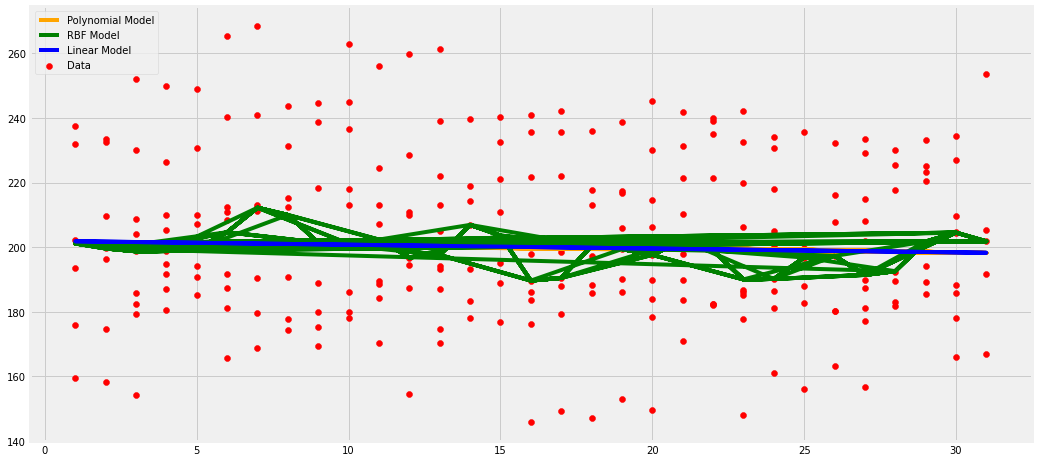

In [34]:
#Plot the models on a graph to see which has the best fit to the original data
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color ='red', label='Data')
plt.plot(days, poly_svr.predict(days), color ='orange', label= 'Polynomial Model')
plt.plot(days, rbf_svr.predict(days), color ='green', label= 'RBF Model')
plt.plot(days, lin_svr.predict(days), color ='blue', label= 'Linear Model')
plt.legend()
plt.show()

In [36]:
#Show the predicted price for the given day
day = [[31]]

print('The RBF SVR predicted: ', rbf_svr.predict(day))
print('The Linear SVR predicted: ', lin_svr.predict(day))
print('The Polynomial SVR predicted: ', poly_svr.predict(day))

The RBF SVR predicted:  [201.80999372]
The Linear SVR predicted:  [198.27625287]
The Polynomial SVR predicted:  [198.20851732]
